# Wine Rough Report

In [1]:
#import libraries
import wrangle_wine as w
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import explore as e

from sklearn.cluster import KMeans

from scipy.stats import ttest_ind
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

## ACQUIRE

In [2]:
df = w.wine_merge_data()

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,strain
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
df.strain.value_counts()

white    4898
red      1599
Name: strain, dtype: int64

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
strain                  0
dtype: int64

In [6]:
df.alcohol.value_counts()

9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
11.000000    217
9.000000     215
9.800000     214
10.400000    194
9.300000     193
9.600000     187
10.800000    177
10.200000    176
9.100000     167
10.100000    161
9.700000     159
9.900000     158
11.400000    153
11.200000    148
10.600000    142
10.900000    137
11.300000    133
10.700000    123
12.000000    123
10.300000    118
11.500000    118
11.100000    110
8.800000     109
12.500000    104
12.200000     98
8.900000      95
11.800000     89
12.400000     81
11.700000     81
8.700000      80
12.300000     74
11.900000     73
12.800000     71
12.600000     69
12.700000     65
12.100000     64
11.600000     61
12.900000     48
13.000000     42
13.400000     23
8.600000      23
13.100000     20
13.200000     15
13.600000     13
13.500000     13
14.000000     12
13.300000     10
8.500000      10
13.700000      7
8.400000       5
9.550000       4
11.450000      4
10.550000      4
11.333333     

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [8]:
numeric_columns.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
train, validate, test = w.wrangle_wine()

In [10]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,strain_red,strain_white
3337,7.5,0.15,0.38,1.8,0.054,19.0,101.0,0.99460,3.24,0.44,10.0,5,white,0,1
2609,7.6,0.16,0.44,1.4,0.043,25.0,109.0,0.99320,3.11,0.75,10.3,6,white,0,1
5238,6.7,0.13,0.32,3.7,0.017,32.0,99.0,0.99348,3.12,0.44,10.0,6,white,0,1
3985,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,4,white,0,1
1399,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,7.5,0.19,0.49,1.8,0.055,19.0,110.0,0.99460,3.33,0.44,9.9,5,white,0,1
3966,7.2,0.30,0.30,8.1,0.050,40.0,188.0,0.99652,3.15,0.49,9.1,6,white,0,1
2130,6.4,0.18,0.48,4.0,0.186,64.0,150.0,0.99450,3.06,0.40,9.3,5,white,0,1
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,0,1


In [11]:
train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test)

In [12]:
train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,strain_red,strain_white
3337,0.305785,0.052209,0.228916,0.018405,0.067002,0.123711,0.315091,0.144399,0.393701,0.125000,0.289855,5,white,0,1
2609,0.314050,0.060241,0.265060,0.012270,0.048576,0.164948,0.341625,0.117409,0.291339,0.301136,0.333333,6,white,0,1
5238,0.239669,0.036145,0.192771,0.047546,0.005025,0.213058,0.308458,0.122807,0.299213,0.125000,0.289855,6,white,0,1
3985,0.256198,0.172691,0.174699,0.010736,0.065327,0.158076,0.606965,0.125506,0.433071,0.181818,0.275362,4,white,0,1
1399,0.280992,0.469880,0.000000,0.024540,0.090452,0.061856,0.059701,0.163678,0.535433,0.284091,0.449275,6,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,0.305785,0.084337,0.295181,0.018405,0.068677,0.123711,0.344942,0.144399,0.464567,0.125000,0.275362,5,white,0,1
3966,0.280992,0.172691,0.180723,0.115031,0.060302,0.268041,0.603648,0.181415,0.322835,0.153409,0.159420,6,white,0,1
2130,0.214876,0.076305,0.289157,0.052147,0.288107,0.432990,0.477612,0.142472,0.251969,0.102273,0.188406,5,white,0,1
1599,0.264463,0.148594,0.216867,0.308282,0.051926,0.302405,0.543947,0.267785,0.204724,0.130682,0.115942,6,white,0,1


## Split Data

In [13]:
train, validate, test = w.wrangle_wine()

In [14]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,strain_red,strain_white
3337,7.5,0.15,0.38,1.8,0.054,19.0,101.0,0.99460,3.24,0.44,10.0,5,white,0,1
2609,7.6,0.16,0.44,1.4,0.043,25.0,109.0,0.99320,3.11,0.75,10.3,6,white,0,1
5238,6.7,0.13,0.32,3.7,0.017,32.0,99.0,0.99348,3.12,0.44,10.0,6,white,0,1
3985,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,4,white,0,1
1399,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,red,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,7.5,0.19,0.49,1.8,0.055,19.0,110.0,0.99460,3.33,0.44,9.9,5,white,0,1
3966,7.2,0.30,0.30,8.1,0.050,40.0,188.0,0.99652,3.15,0.49,9.1,6,white,0,1
2130,6.4,0.18,0.48,4.0,0.186,64.0,150.0,0.99450,3.06,0.40,9.3,5,white,0,1
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,0,1


## Explore

In [15]:
train.duplicated().value_counts()

False    2979
dtype: int64

In [16]:
train.strain.value_counts()

white    2224
red       755
Name: strain, dtype: int64

In [17]:
train_scaled.strain.value_counts()

white    2224
red       755
Name: strain, dtype: int64

### Data visualization

In [18]:
column_data_types_df = df.dtypes.reset_index()
column_data_types_df.columns = ['Column', 'Data Type']
print(column_data_types_df)

                  Column Data Type
0          fixed acidity   float64
1       volatile acidity   float64
2            citric acid   float64
3         residual sugar   float64
4              chlorides   float64
5    free sulfur dioxide   float64
6   total sulfur dioxide   float64
7                density   float64
8                     pH   float64
9              sulphates   float64
10               alcohol   float64
11               quality     int64
12                strain    object


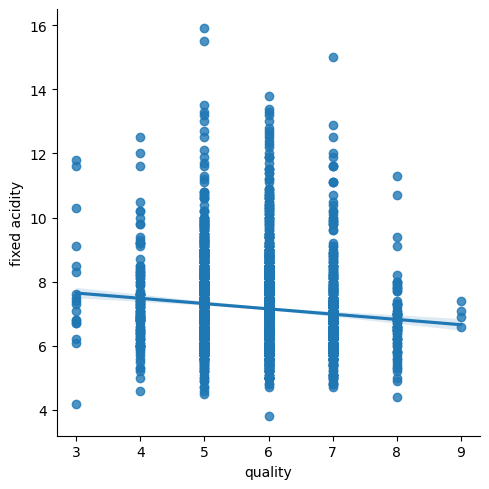

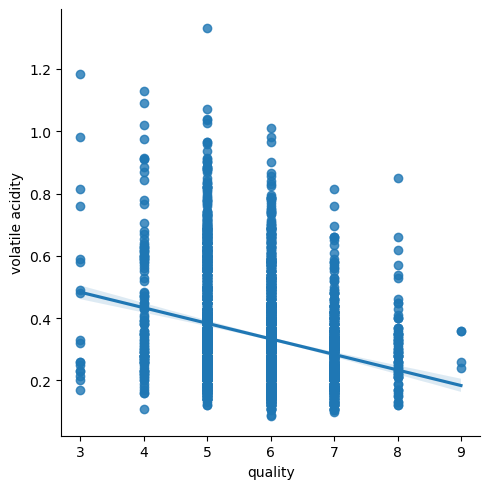

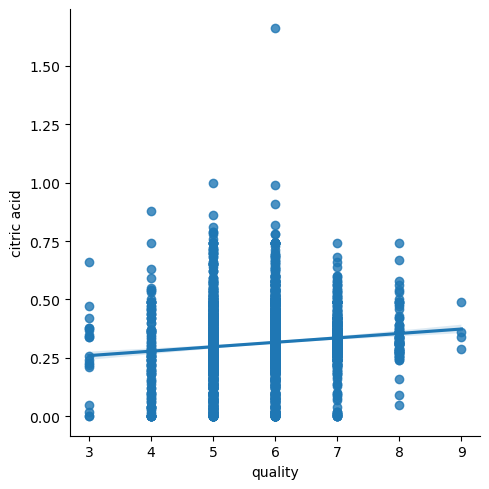

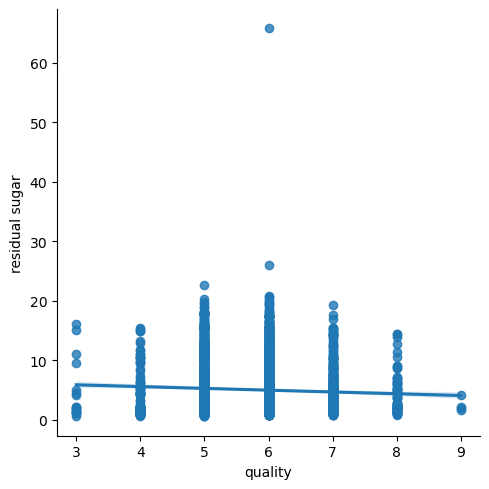

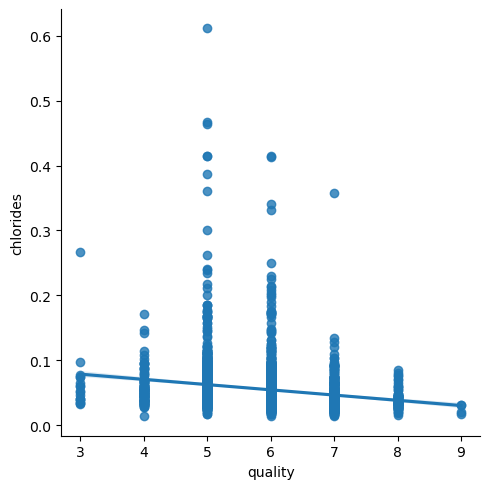

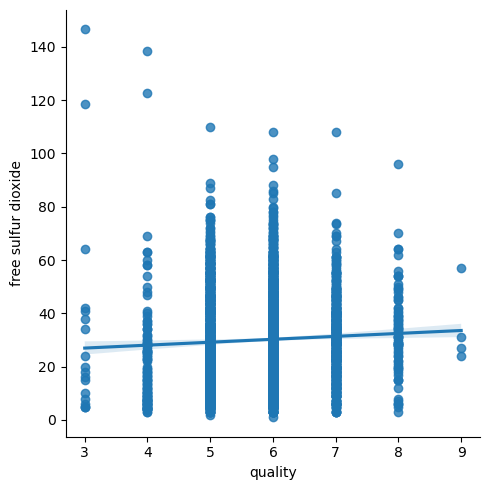

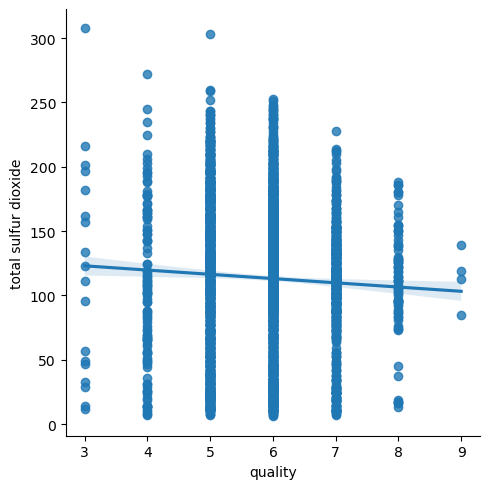

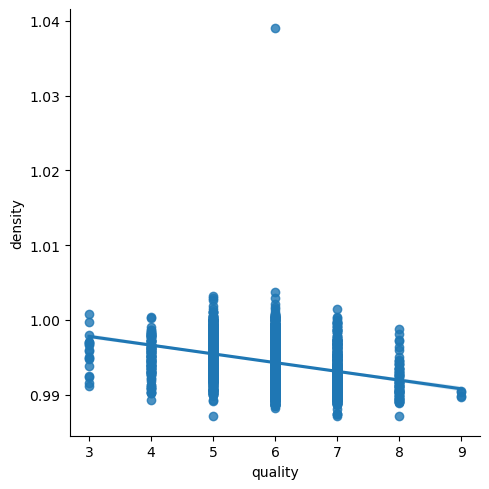

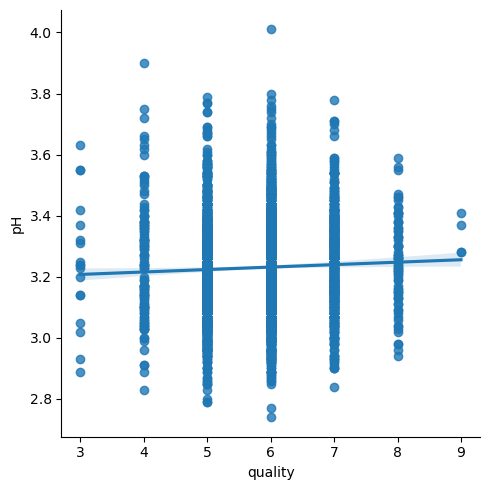

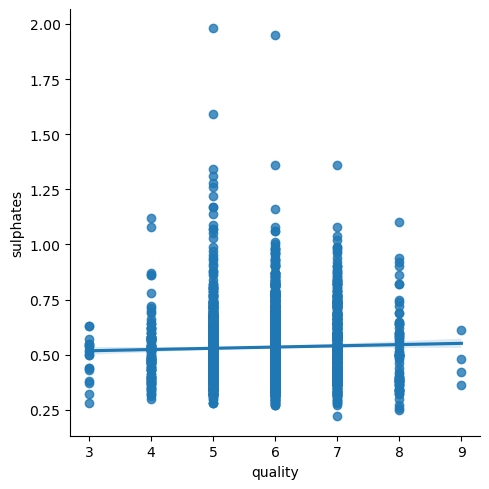

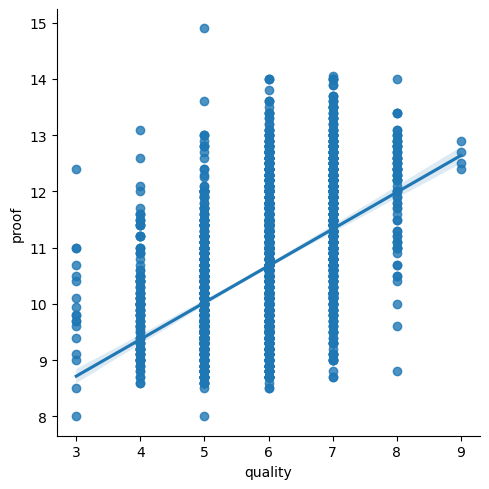

In [19]:
e.plot_variable_pairs(train)

In [20]:
        cat_var_col = 'quality'
        con_var_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'proof']

In [21]:
# e.plot_continuous_vs_categorical(train, cat_var_col, con_var_col)

### from the visuals it does seem as there may be drivers for quality which include: strain, proof, sulphates, free sulphur dioxide, chlorides, citric acid, volatile acid and fixed acidity.

### checking .corr on train data

Text(0.5, 1.0, 'Heat Plot')

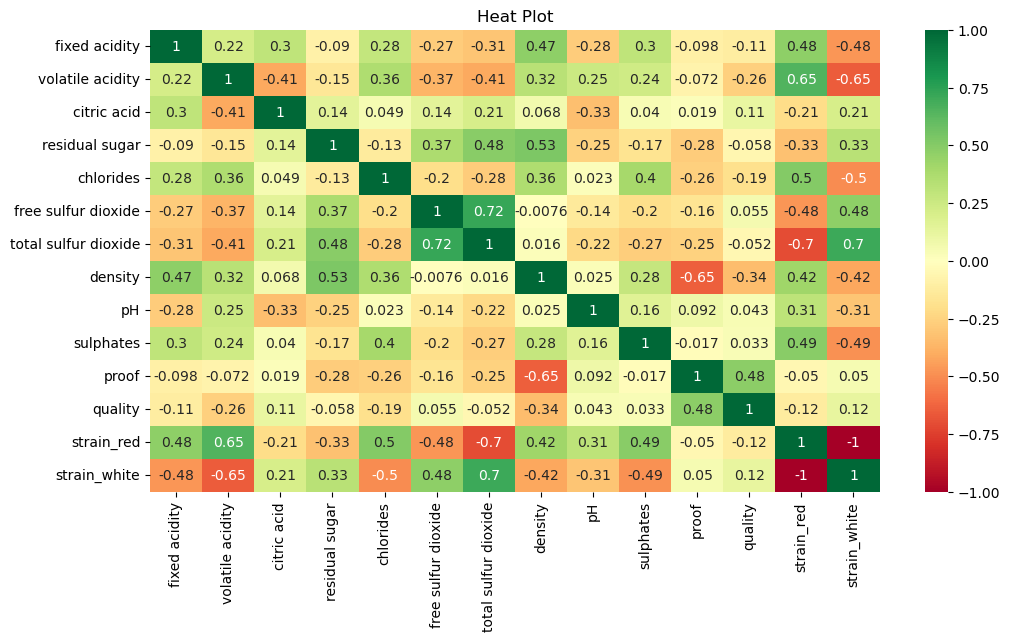

In [22]:
plt.figure(figsize=(40, 6))


plt.subplot(132)
sns.heatmap(train.corr(), cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True,)
plt.title('Heat Plot')

In [23]:
train.corr()['quality']

fixed acidity          -0.111192
volatile acidity       -0.260831
citric acid             0.112260
residual sugar         -0.057624
chlorides              -0.193462
free sulfur dioxide     0.055472
total sulfur dioxide   -0.051509
density                -0.343499
pH                      0.043347
sulphates               0.032976
proof                   0.480670
quality                 1.000000
strain_red             -0.121539
strain_white            0.121539
Name: quality, dtype: float64

Text(0.5, 1.0, 'Heat Plot')

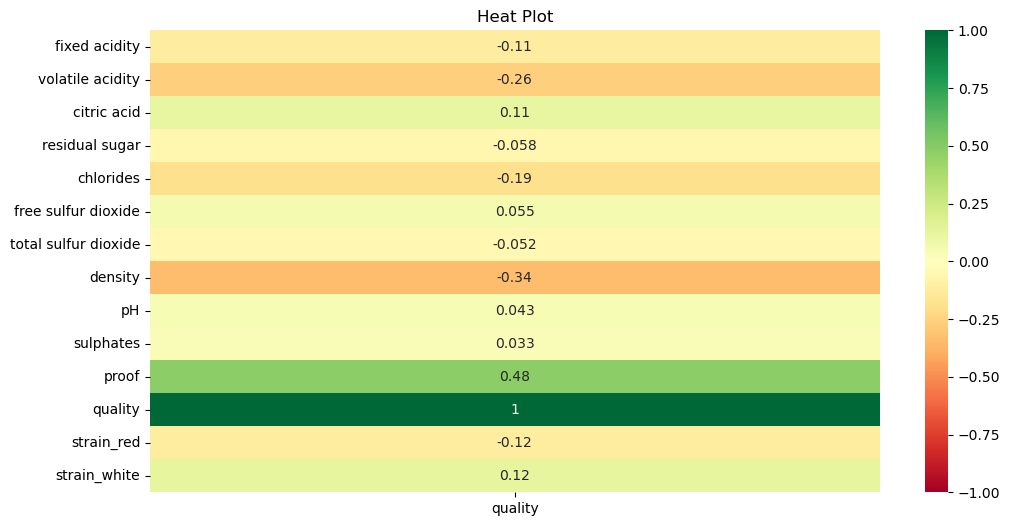

In [24]:
plt.figure(figsize=(40, 6))


plt.subplot(132)
sns.heatmap(train.corr()[['quality']], cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True,)
plt.title('Heat Plot')

### Features that have a medium to high relationship are: Proof,citric acid, free sulfur dioxide

## Stats Testing Selected Features Using PearsonsR

### Is proof correlated with the wine's quality?

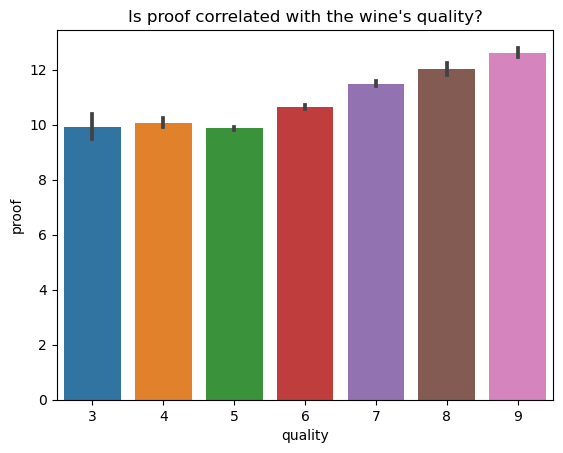

In [34]:
sns.barplot(x=train.quality, y=train.proof)
plt.title("Is proof correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("proof")
plt.show()

- Visual it seems as the proof of the wine increases so does the quality

#### I will now use a Pearsons R test to investigate whether proof and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: proof and quality are not correlated.
#### Ha: proof and quality are correlated.

In [35]:
# sets alpha
alpha = 0.05
proof = train['proof']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.4806700681237368
p-value:  4.439061886953334e-172


In [36]:
p_value < alpha

True

####  We can reject the null hypothesis

### Is citric acid correlated with the wine's quality?

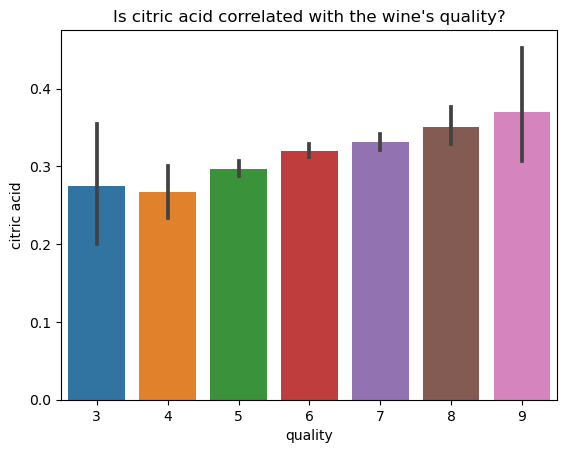

In [43]:
sns.barplot(x=train.quality, y=train['citric acid'])
plt.title("Is citric acid correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()

- Visually we can see that the quality is much higher the more citric acid that the wine contains

#### I will now use a Pearsons R test to investigate whether citric acid and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: citric acid and quality are not correlated.
#### Ha: citric acid and quality are correlated.

In [39]:
# sets alpha
alpha = 0.05
proof = train['citric acid']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.11225955145615578
p-value:  8.046463019989137e-10


In [40]:
p_value < alpha

True

#### We can reject the null hypothesis

### Is free sulfur dioxide correlated with the wine's quality?

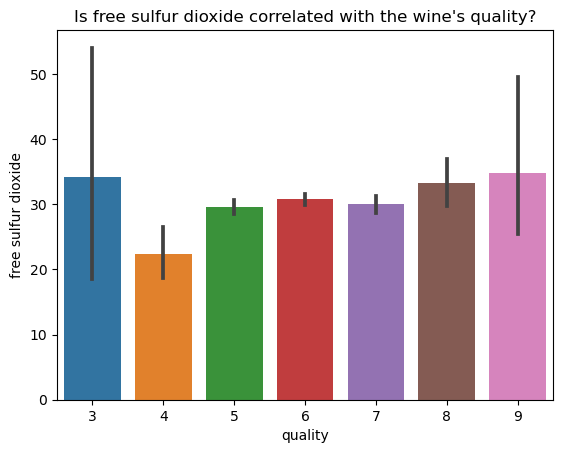

In [42]:
sns.barplot(x=train.quality, y=train['free sulfur dioxide'])
plt.title("Is free sulfur dioxide correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.show()

- Looking at this barplot it looks like the highest free sulfur dioxide, and the lowest, obtain higher quality scores

#### I will now use a Pearsons R test to investigate whether proof and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: free sulfur dioxide and quality are not correlated.
#### Ha: free sulfur dioxide and quality are correlated.

In [45]:
# sets alpha
alpha = 0.05
proof = train['free sulfur dioxide']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.055471815658097244
p-value:  0.0024558802131494175


In [46]:
p_value < alpha

True

###  We can reject the null hypothesis

## Finding the best k= for clustering

In [26]:
X = train[['proof', 'citric acid']]

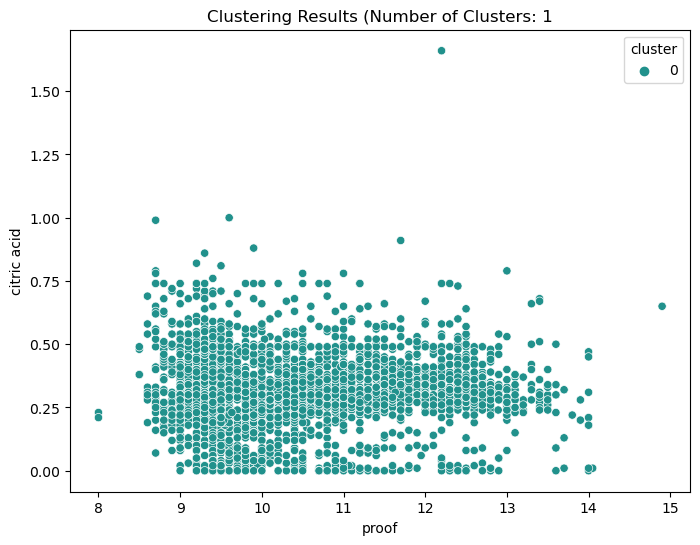

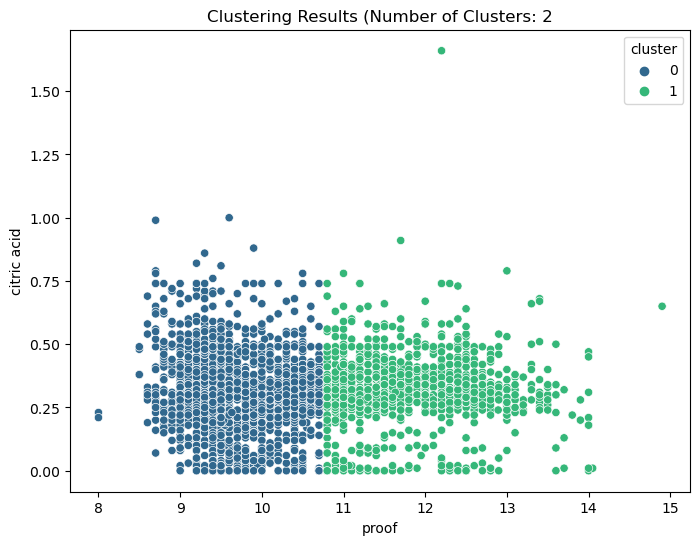

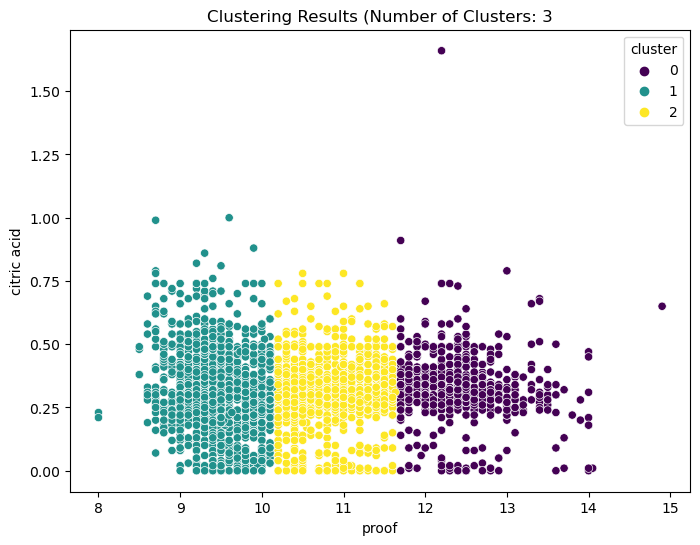

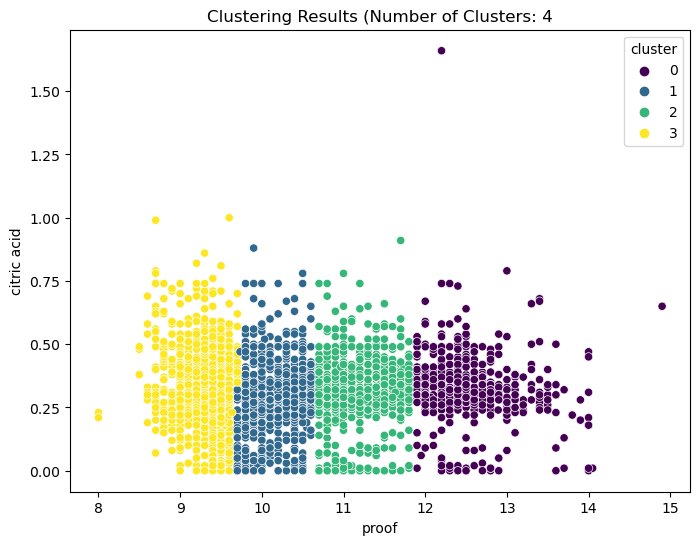

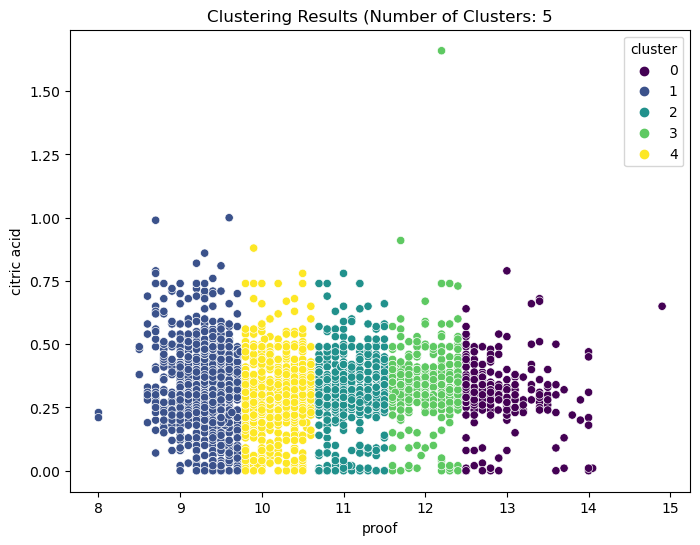

In [27]:
for k in range(1, 6):

    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(X)
    

    cluster_labels = kmeans.predict(X)
    
    train_clustered = train.copy()
    train_clustered['cluster'] = cluster_labels
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_clustered, x='proof', y='citric acid',hue= 'cluster', palette='viridis')
    plt.xlabel('proof')
    plt.ylabel('citric acid')
    plt.title(f'Clustering Results (Number of Clusters: {k}')
    plt.show()

## Elbow Method

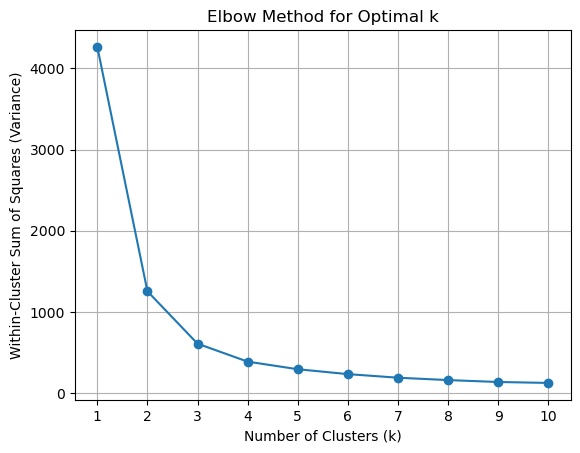

In [28]:
scaled_cluster_variances = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(X)

    scaled_cluster_variances.append(kmeans.inertia_)

plt.plot(range(1, 11), scaled_cluster_variances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Variance)')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()

- K=3 is the optimal k-value based of the elbow method and the cluster scatterplots above